# 1. Import Libraries
Import all the libraries to be used in this notebook. I prefer to do this at the initial stage and added more libraries as I went along on the project

In [6]:
import tweepy # for tweet mining
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import csv # to read and write csv files
import re # In-built regular expressions library
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import matplotlib.pyplot as plt # for plotting

# Set the limits for Pandas Dataframe display to avoid potential system freeze
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 15)
pd.set_option('display.max_colwidth', 40)

# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

from textblob import TextBlob # TextBlob - Python library for processing textual data

import plotly.express as px # To make express plots in Plotly
import chart_studio.tools as cst # For exporting to Chart studio
import chart_studio.plotly as py # for exporting Plotly visualizations to Chart Studio
import plotly.offline as pyo # Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio # Plotly renderer
import plotly.graph_objects as go # For plotting plotly graph objects
from plotly.subplots import make_subplots #to make more than one plot in Plotly


# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

from emot.emo_unicode import UNICODE_EMO, EMOTICONS # For emojis

# 2. Tweets Mining
I used the Tweepy library for Python to scrape tweets. You need a developer account with Twitter to get the keys used below for this task.

In [7]:
consumer_key='mukhowgTpRuIyzTBDKDbN4qKz'
consumer_secret='Rr2TilHTnWhVMMcmQbQX59p269ZaGRPhzAdFm5dNSTf7UOL7PY'
access_key ='1252454673652412417-hlg9ZJNEldNWsH2ior8W08beHa7Ztw'
access_secret='oYi3EhzvD8XoYyEfy5ZCb9K9WeNKYrHGpLM4XD54bFZmi'

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) # Pass in Consumer key and secret for authentication by API
auth.set_access_token(access_key, access_secret) # Pass in Access key and secret for authentication by API
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True) # Sleeps when API limit is reached

## Creating User-defined Functions for Tweets Mining

I created 4 different functions for the different search queries I had and stored them in a csv file. This is because I ran the program for 3 consecutive days 22nd to 25th of December. For the 1st run, I did not have to specify the "since_id" but I had to for the following days so that Twitter API does not return Tweets I already had. Another thing to note is you don't have to specify a sleep time for your function. Tweepy has a built-in attribute "wait_on_rate_limit" which I specified above.

### Search Phrases for sentiment analysis:
"vaccine",
"pfizer",
"moderna",
"johnson and johnson",
"astrazeneca",
"sputnik"

### Keywords for hashtags:
"covid", 
"vaccine",
"pandemic"

In [18]:
def get_tweets2(search_query2, num_tweets2, since_id_num2):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list2 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query2,
                                    lang="en",
                                    since_id=since_id_num2,
                                    tweet_mode='extended').items(num_tweets2)]
    # Begin scraping the tweets individually:
    for tweet in tweet_list2[::-1]:
        tweet_id = tweet.id # get Tweet ID result
        created_at = tweet.created_at # get time tweet was created
        text = tweet.full_text # retrieve full tweet text
        location = tweet.user.location # retrieve user location
        retweet = tweet.retweet_count # retrieve number of retweets
        favorite = tweet.favorite_count # retrieve number of likes
        verified = tweet.user.verified #retrieve if the user is verified or not
        with open('vaccine.csv','a', newline='', encoding='utf-8') as csvFile2:
            csv_writer2 = csv.writer(csvFile2, delimiter=',') # create an instance of csv object
            csv_writer2.writerow([tweet_id, created_at, text, location, retweet, favorite, verified]) # write each row

In [42]:
search_words2 = "\"vaccine\"" # Specifying exact phrase to search
# Exclude Links, retweets, replies
search_query2 = search_words2 + " -filter:links AND -filter:retweets AND -filter:replies" 
with open('tweets_2020_has_been.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
#get_tweets2(search_query2, 10000, None)
get_tweets2(search_query2, 10000, latest_tweet)

Rate limit reached. Sleeping for: 828
Rate limit reached. Sleeping for: 830
Rate limit reached. Sleeping for: 820


In [44]:
# Same as above
def get_tweets3(search_query3, num_tweets3, since_id_num3):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list3 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query3,
                                    since_id=since_id_num3,
                                    lang="en",
                                    tweet_mode='extended').items(num_tweets3)]

    # Begin scraping the tweets individually:
    for tweet in tweet_list3[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        verified = tweet.user.verified #retrieve if the user is verified or not
        with open('pfizer.csv', 'a', newline='', encoding='utf-8') as csvFile3:
            csv_writer3 = csv.writer(csvFile3, delimiter=',')
            csv_writer3.writerow([tweet_id, created_at, text, location, retweet, favorite, verified])

In [45]:
search_words3 = "\"pfizer\"" # Specifying exact phrase to search
# Exclude Links, retweets, replies
search_query3 = search_words3 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('pfizer.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
#get_tweets3(search_query3, 10000, None)
get_tweets3(search_query3, 10000, latest_tweet)

Rate limit reached. Sleeping for: 235


In [46]:
# Same as above
def get_tweets4(search_query4, num_tweets4, since_id_num4):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list4 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query4,
                                    lang="en",
                                    since_id=since_id_num4,
                                    tweet_mode='extended').items(num_tweets4)]

    # Begin scraping the tweets individually:
    for tweet in tweet_list4[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        verified = tweet.user.verified #retrieve if the user is verified or not
        with open('moderna.csv','a', newline='', encoding='utf-8') as csvFile4:
            csv_writer4 = csv.writer(csvFile4, delimiter=',')
            csv_writer4.writerow([tweet_id, created_at, text, location, retweet, favorite, verified])

In [47]:
search_words4 = "\"moderna\"" # Specifying exact phrase to search
# Exclude Links, retweets, replies
search_query4 = search_words4 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('moderna.csv',encoding='utf-8') as data:
    latest_tweet=int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
#get_tweets4(search_query4, 10000, None)
get_tweets4(search_query4,10000,latest_tweet)

In [48]:
def get_tweets5(search_query5, num_tweets5, since_id_num5):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list5 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query5,
                                    lang="en",
                                    since_id=since_id_num5,
                                    tweet_mode='extended').items(num_tweets5)]

    # Begin scraping the tweets individually:
    for tweet in tweet_list5[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        verified = tweet.user.verified #retrieve if the user is verified or not
        with open('johnson_and_johnson.csv','a',newline='', encoding='utf-8') as csvFile5:
            csv_writer5 = csv.writer(csvFile5, delimiter=',')
            csv_writer5.writerow([tweet_id, created_at, text, location, retweet, favorite, verified])

In [49]:
search_words5 = "\"johnson and johnson\"" # Specifying exact phrase to search
search_query5 = search_words5 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('johnson_and_johnson.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
#get_tweets5(search_query5, 10000, None)
get_tweets5(search_query5, 10000, latest_tweet)

In [50]:
def get_tweets6(search_query6, num_tweets6, since_id_num6):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list6 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query6,
                                    lang="en",
                                    since_id=since_id_num6,
                                    tweet_mode='extended').items(num_tweets6)]

    # Begin scraping the tweets individually:
    for tweet in tweet_list6[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        verified = tweet.user.verified #retrieve if the user is verified or not
        with open('astrazeneca.csv','a',newline='', encoding='utf-8') as csvFile6:
            csv_writer6 = csv.writer(csvFile6, delimiter=',')
            csv_writer6.writerow([tweet_id, created_at, text, location, retweet, favorite, verified])

In [51]:
search_words6 = "\"astrazeneca\"" # Specifying exact phrase to search
search_query6 = search_words6 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('astrazeneca.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
#get_tweets6(search_query6, 10000, None)
get_tweets6(search_query6, 10000, latest_tweet)

In [56]:
def get_tweets7(search_query7, num_tweets7, since_id_num7):
    # Collect tweets using the Cursor object
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweet_list7 = [tweets for tweets in tweepy.Cursor(api.search,
                                    q=search_query7,
                                    lang="en",
                                    since_id=since_id_num7,
                                    tweet_mode='extended').items(num_tweets7)]

    # Begin scraping the tweets individually:
    for tweet in tweet_list7[::-1]:
        tweet_id = tweet.id
        created_at = tweet.created_at
        text = tweet.full_text
        location = tweet.user.location
        retweet = tweet.retweet_count
        favorite = tweet.favorite_count
        verified = tweet.user.verified #retrieve if the user is verified or not
        with open('sputnik.csv','a',newline='', encoding='utf-8') as csvFile7:
            csv_writer7 = csv.writer(csvFile7, delimiter=',')
            csv_writer7.writerow([tweet_id, created_at, text, location, retweet, favorite, verified])

In [58]:
search_words7 = "\"sputnik\"" # Specifying exact phrase to search
search_query7 = search_words7 + " -filter:links AND -filter:retweets AND -filter:replies"
with open('sputnik.csv', encoding='utf-8') as data:
    latest_tweet = int(list(csv.reader(data))[-1][0]) # Return the most recent tweet ID
#get_tweets7(search_query7, 10000, None)
get_tweets7(search_query7, 10000, latest_tweet)

In [74]:
path = r'/Users/muhtasim/PySpark_project/_CoVax'  # use your path
all_files = glob.glob(path + "/*.csv")

tweets = []

columns=['tweet_id','created_at',
         'text','location',
         'retweet','favorite','verified']

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, names=columns, header=None) # Convert each csv to a dataframe
    tweets.append(df)

tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Merge all dataframes

tweets_df.head()

,tweet_id,created_at,text,location,retweet,favorite,verified
0,1405106153642676224,2021-06-16 10:13:07,I wanted to do somethin for Sonic's ...,NaN,0,0,0.0
1,1405107872556535815,2021-06-16 10:19:57,Finally had my first vaccine and I g...,"London, UK",1,9,0.0
2,1405108372064673802,2021-06-16 10:21:56,"Moderna, part 1 of 2, done.",Iceland,0,9,0.0
3,1405109454018916352,2021-06-16 10:26:14,First dose of Moderna vaccine done 💉...,"Worcester, England",0,1,0.0
4,1405111073703968772,2021-06-16 10:32:40,Fun side effect of moderna vaxx two:...,NaN,0,0,0.0


In [75]:
tweets_df.dtypes

tweet_id        int64
created_at     object
text           object
location       object
retweet         int64
favorite        int64
verified      float64
dtype: object

In [76]:
tweets_df.shape #Get number of rows and columns

(52893, 7)

In [77]:
tweets_df.duplicated(subset='tweet_id').sum() # Check for duplicate values

10335

In [78]:
tweets_df=tweets_df.drop_duplicates(subset=['tweet_id']) # drop duplicate values

In [79]:
tweets_df.shape # Check the shape after dropping duplicates

(42558, 7)

In [80]:
tweets_df.isna().any() # Check for "NaN" values

tweet_id      False
created_at    False
text          False
location       True
retweet       False
favorite      False
verified       True
dtype: bool

In [81]:
tweets_df['location']=tweets_df['location'].fillna('Not known') # Replace "NaN" values with "No Location"
tweets_df['verified']=tweets_df['verified'].fillna(0.0) # Replace "NaN" values with "No Location"

In [82]:
tweets_df.isna().any() # Check for "NaN" values again

tweet_id      False
created_at    False
text          False
location      False
retweet       False
favorite      False
verified      False
dtype: bool

In [83]:
URL = "https://geocode.search.hereapi.com/v1/geocode"  # Deevloper Here API link
api_key = 'dxbfqIf7rij-wwKAAlzHERT2p_t-MTpvh9CgfJYYTCI'  # Acquire api key from developer.here.com

def getCoordinates(location):
    PARAMS = {'apikey': api_key, 'q': location} # required parameters
    r = requests.get(url=URL, params=PARAMS)  # pass in required parameters
    # get raw json file. I did  this because when I combined this step with my "getLocation" function, 
    # it gave me error for countries with no country_code or country_name. Hence, I needed to use try - except block
    data = r.json() # Raw json file 
    return data

In [84]:
tweets_df['Location_data']=tweets_df['location'].apply(getCoordinates) # Apply getCoordinates Function

In [85]:
# a function to extract required coordinates information to the tweets_df dataframe

def getLocation(location):
    for data in location:
        if len(location['items'])>0:
            latitude = location['items'][0]['position']['lat']
            longitude = location['items'][0]['position']['lng']
            try:   
                country_code = location['items'][0]['address']['countryCode']
                country_name = location['items'][0]['address']['countryName']
                country_name = location['items'][0]['address']['countryName']
            except KeyError:
                country_code = float('Nan')
                country_name = float('Nan')
        else: 
            latitude = float('Nan')
            longitude = float('Nan')
            country_code = float('Nan') 
            country_name = float('Nan')
        result = (latitude, longitude, country_code, country_name)
    return result

In [86]:
tweets_df['location']=tweets_df['Location_data'].apply(getLocation) #apply getLocation function

In [87]:
tweets_df.head() # Check dataframe first 5 rows

,tweet_id,created_at,text,location,retweet,favorite,verified,Location_data
0,1405106153642676224,2021-06-16 10:13:07,I wanted to do somethin for Sonic's ...,"(37.01977, -88.52813, USA, United St...",0,0,0.0,"{'items': [{'title': 'None Known, Pa..."
1,1405107872556535815,2021-06-16 10:19:57,Finally had my first vaccine and I g...,"(51.50643, -0.12719, GBR, United Kin...",1,9,0.0,"{'items': [{'title': 'London, Englan..."
2,1405108372064673802,2021-06-16 10:21:56,"Moderna, part 1 of 2, done.","(64.14748, -21.93428, ISL, Ísland)",0,9,0.0,"{'items': [{'title': 'Ísland', 'id':..."
3,1405109454018916352,2021-06-16 10:26:14,First dose of Moderna vaccine done 💉...,"(52.19106, -2.22222, GBR, United Kin...",0,1,0.0,"{'items': [{'title': 'Worcester, Eng..."
4,1405111073703968772,2021-06-16 10:32:40,Fun side effect of moderna vaxx two:...,"(37.01977, -88.52813, USA, United St...",0,0,0.0,"{'items': [{'title': 'None Known, Pa..."


In [88]:
# Extraction of Location Coordinates and Country names to different columns
tweets_df[['Latitude', 'Longitude', 'Country_Code', 'Country_Name']] = pd.DataFrame(tweets_df['location'].tolist(),
                                           index=tweets_df.index)

In [102]:
tweets_df.head() # Check dataframe first 5 rows

,tweet_id,created_at,text,retweet,favorite,verified,Latitude,Longitude,Country_Code,Country_Name
0,1405106153642676224,2021-06-16 10:13:07,I wanted to do somethin for Sonic's ...,0,0,0.0,37.01977,-88.52813,USA,United States
1,1405107872556535815,2021-06-16 10:19:57,Finally had my first vaccine and I g...,1,9,0.0,51.50643,-0.12719,GBR,United Kingdom
2,1405108372064673802,2021-06-16 10:21:56,"Moderna, part 1 of 2, done.",0,9,0.0,64.14748,-21.93428,ISL,Ísland
3,1405109454018916352,2021-06-16 10:26:14,First dose of Moderna vaccine done 💉...,0,1,0.0,52.19106,-2.22222,GBR,United Kingdom
4,1405111073703968772,2021-06-16 10:32:40,Fun side effect of moderna vaxx two:...,0,0,0.0,37.01977,-88.52813,USA,United States


In [103]:
# Drop unnecessary columns
#tweets_df.drop(['Location_data','location'], axis=1, inplace=True)
# Rename columns
tweets_df.columns=['Tweet_ID','Time_Created','Tweet','Retweet_Count','Favorite_Count', 'Verified',
                   'Latitude','Longitude','Country_Code','Country_Name']

In [104]:
tweets_df.head() # Check dataframe first 5 rows

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Verified,Latitude,Longitude,Country_Code,Country_Name
0,1405106153642676224,2021-06-16 10:13:07,I wanted to do somethin for Sonic's ...,0,0,0.0,37.01977,-88.52813,USA,United States
1,1405107872556535815,2021-06-16 10:19:57,Finally had my first vaccine and I g...,1,9,0.0,51.50643,-0.12719,GBR,United Kingdom
2,1405108372064673802,2021-06-16 10:21:56,"Moderna, part 1 of 2, done.",0,9,0.0,64.14748,-21.93428,ISL,Ísland
3,1405109454018916352,2021-06-16 10:26:14,First dose of Moderna vaccine done 💉...,0,1,0.0,52.19106,-2.22222,GBR,United Kingdom
4,1405111073703968772,2021-06-16 10:32:40,Fun side effect of moderna vaxx two:...,0,0,0.0,37.01977,-88.52813,USA,United States


In [105]:
# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them


# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [106]:
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))
user_stop_words = ['2020', 'year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt',
                    'havent', 'hasnt', 'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent',
                    'mustnt', '’', '...', '..', '.', '.....', '....', 'been…', 'one', 'two',
                    'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'aht',
                    've', 'next']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets
word_list = words.words()  # all words in English language
emojis = list(UNICODE_EMO.keys())  # full list of emojis

In [107]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/muhtasim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/muhtasim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/muhtasim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [108]:
# Apply preProcessTweets function to the 'Tweet' column to generate a new column called 'Processed Tweets'.
# This took 23 mins to run for 50,780 rows
tweets_df['Processed_Tweets'] = tweets_df['Tweet'].apply(preprocessTweets)

In [109]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(getAdjectives)

In [110]:
tweets_df.head() # Check dataframe first 5 rows

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Verified,Latitude,Longitude,Country_Code,Country_Name,Processed_Tweets,Tweets_Adjectives
0,1405106153642676224,2021-06-16 10:13:07,I wanted to do somethin for Sonic's ...,0,0,0.0,37.01977,-88.52813,USA,United States,sonic th anniversary draw classic ni...,sonic anniversary classic nice cos lazy
1,1405107872556535815,2021-06-16 10:19:57,Finally had my first vaccine and I g...,1,9,0.0,51.50643,-0.12719,GBR,United Kingdom,finally first vaccine got happy doll...,first happy magic
2,1405108372064673802,2021-06-16 10:21:56,"Moderna, part 1 of 2, done.",0,9,0.0,64.14748,-21.93428,ISL,Ísland,part done,
3,1405109454018916352,2021-06-16 10:26:14,First dose of Moderna vaccine done 💉...,0,1,0.0,52.19106,-2.22222,GBR,United Kingdom,first dose vaccine done hopefully wi...,dose
4,1405111073703968772,2021-06-16 10:32:40,Fun side effect of moderna vaxx two:...,0,0,0.0,37.01977,-88.52813,USA,United States,fun side effect incredible multiple ...,fun incredible multiple terrible


In [111]:
# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [112]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
tweets_df['Tweets_Sentiments'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [113]:
tweets_df.head() # Check dataframe first 5 rows

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Verified,Latitude,Longitude,Country_Code,Country_Name,Processed_Tweets,Tweets_Adjectives,Tweets_Sentiments
0,1405106153642676224,2021-06-16 10:13:07,I wanted to do somethin for Sonic's ...,0,0,0.0,37.01977,-88.52813,USA,United States,sonic th anniversary draw classic ni...,sonic anniversary classic nice cos lazy,sonic th anniversary draw classic ni...
1,1405107872556535815,2021-06-16 10:19:57,Finally had my first vaccine and I g...,1,9,0.0,51.50643,-0.12719,GBR,United Kingdom,finally first vaccine got happy doll...,first happy magic,finally first vaccine got happy doll...
2,1405108372064673802,2021-06-16 10:21:56,"Moderna, part 1 of 2, done.",0,9,0.0,64.14748,-21.93428,ISL,Ísland,part done,,part done
3,1405109454018916352,2021-06-16 10:26:14,First dose of Moderna vaccine done 💉...,0,1,0.0,52.19106,-2.22222,GBR,United Kingdom,first dose vaccine done hopefully wi...,dose,first dose vaccine done hopefully wi...
4,1405111073703968772,2021-06-16 10:32:40,Fun side effect of moderna vaxx two:...,0,0,0.0,37.01977,-88.52813,USA,United States,fun side effect incredible multiple ...,fun incredible multiple terrible,fun side effect incredible multiple ...


In [114]:
# I had to write my results to a csv file at every instance due to the amount of time it took for the preprocessTweets
#  function to run
tweets_df.to_csv('processed/Tweets_Processed.csv',encoding='utf-8-sig', index=False) 
# Also, encoding is important when writing text to csv file

In [115]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

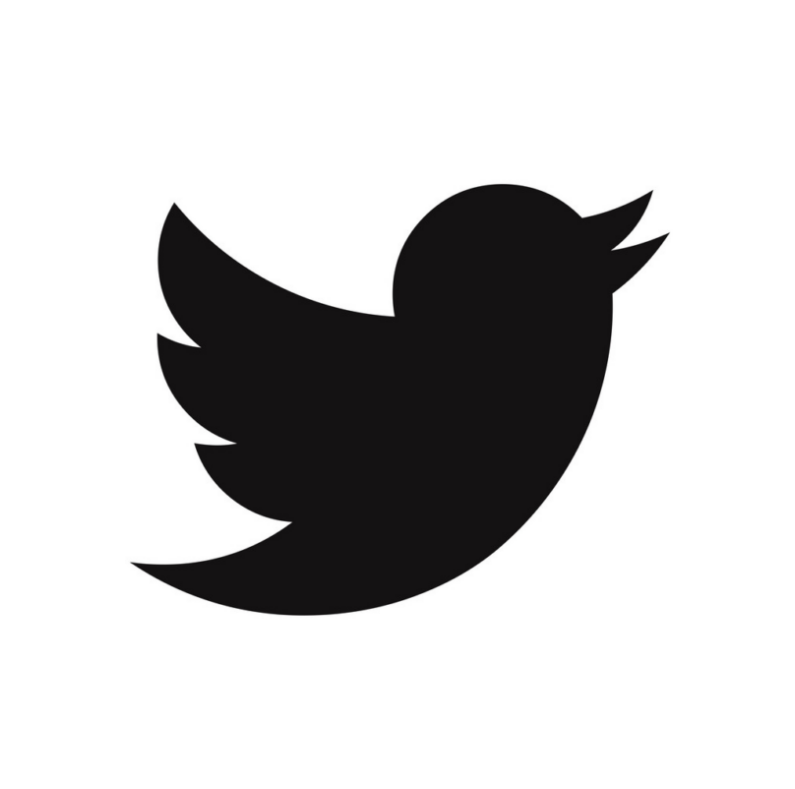

In [116]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [117]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

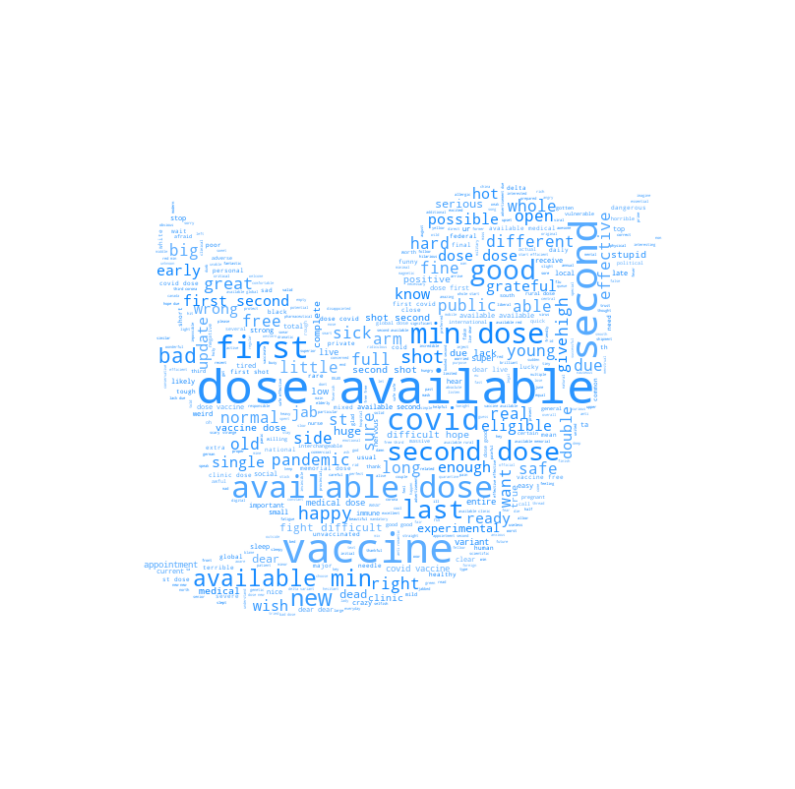

In [118]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [119]:
twitter_wc.to_file("wordcloud.png") #save to a png file

In [120]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [121]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [122]:
df.head(10)  # Check dataframe first 10 rows

,Words,Count
9,dose,6785
77,available,4410
26,second,4213
19,vaccine,3260
6,first,1942
143,covid,1696
22,good,1341
2558,min,1173
58,last,943
94,new,924


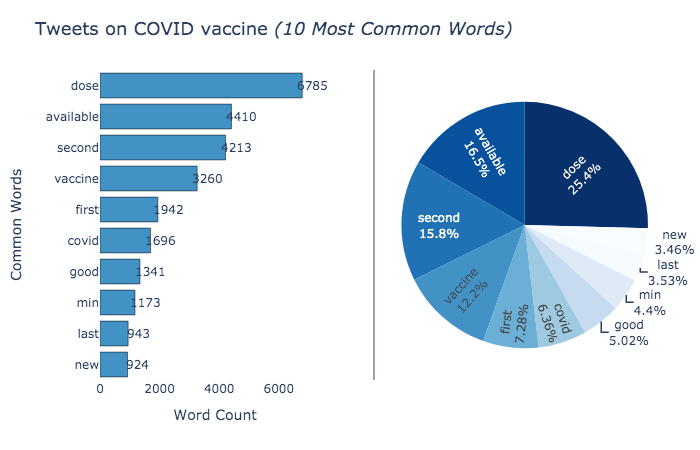

In [124]:
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = df['Count'].head(10), y=df['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=df['Words'].head(10),values=df['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Tweets on COVID vaccine <i>(10 Most Common Words)</i>",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = df['Count'].head(10).to_list()
y = df['Words'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show(renderer = 'png')

In [ ]:
## Export to Plot to Chart Studio using my Chart Studio Credentials
#py.plot(fig, filename = 'Twitter Users 2020 Refelections (10 Most Common Words)', auto_open=True)

In [125]:
# Create function to obtain Subjectivity Score
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [126]:
# Apply all functions above to respective columns
tweets_df['Subjectivity']=tweets_df['Tweets_Sentiments'].apply(getSubjectivity)
tweets_df['Polarity']=tweets_df['Tweets_Sentiments'].apply(getPolarity)
tweets_df['Sentiment']=tweets_df['Polarity'].apply(getSentimentTextBlob)

In [127]:
# See quick results of the Sentiment Analysis
tweets_df['Sentiment'].value_counts()

Positive    20037
Neutral     15017
Negative     7504
Name: Sentiment, dtype: int64

In [128]:
# Create dataframe for Count of Sentiment Categories
bar_chart = tweets_df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()

In [129]:
bar_chart # Display dataframe

,Sentiment,Total Tweets
0,Positive,20037
1,Neutral,15017
2,Negative,7504


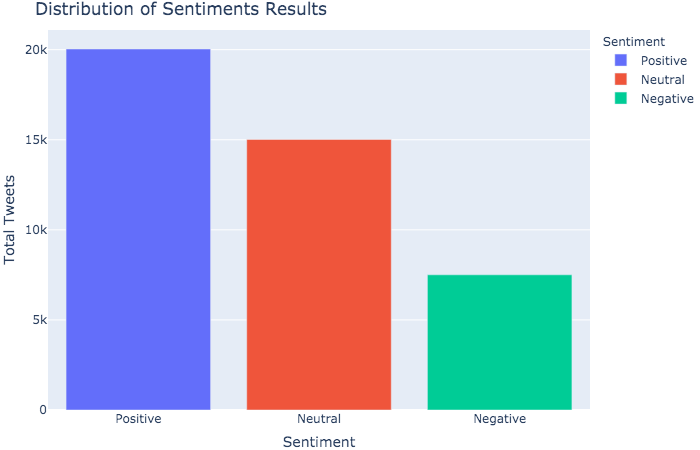

In [130]:
sentiments_barchart = px.bar(bar_chart, x = 'Sentiment', y='Total Tweets', color='Sentiment')

sentiments_barchart.update_layout(title='Distribution of Sentiments Results',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

sentiments_barchart.show(renderer = 'png') #Display plot. 

# I used renderer so that the plots show on the web when people view my notebook. 
# For interactive plots, exclude the "renderer" argument
# Note, I further customized the plot on Chart Studio for my Medium post


In [ ]:
# Export to Plot to Chart Studio using my Chart Studio Credentials. 
#py.plot(sentiments_barchart, filename = 'Distribution of Sentiments Results', auto_open=True)

In [131]:
tweets_df.head() # Check dataframe first 5 rows

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Verified,Latitude,...,Country_Name,Processed_Tweets,Tweets_Adjectives,Tweets_Sentiments,Subjectivity,Polarity,Sentiment
0,1405106153642676224,2021-06-16 10:13:07,I wanted to do somethin for Sonic's ...,0,0,0.0,37.01977,...,United States,sonic th anniversary draw classic ni...,sonic anniversary classic nice cos lazy,sonic th anniversary draw classic ni...,0.722222,0.172222,Positive
1,1405107872556535815,2021-06-16 10:19:57,Finally had my first vaccine and I g...,1,9,0.0,51.50643,...,United Kingdom,finally first vaccine got happy doll...,first happy magic,finally first vaccine got happy doll...,0.777778,0.516667,Positive
2,1405108372064673802,2021-06-16 10:21:56,"Moderna, part 1 of 2, done.",0,9,0.0,64.14748,...,Ísland,part done,,part done,0.000000,0.000000,Neutral
3,1405109454018916352,2021-06-16 10:26:14,First dose of Moderna vaccine done 💉...,0,1,0.0,52.19106,...,United Kingdom,first dose vaccine done hopefully wi...,dose,first dose vaccine done hopefully wi...,0.244444,0.350000,Positive
4,1405111073703968772,2021-06-16 10:32:40,Fun side effect of moderna vaxx two:...,0,0,0.0,37.01977,...,United States,fun side effect incredible multiple ...,fun incredible multiple terrible,fun side effect incredible multiple ...,0.525000,0.050000,Positive


In [138]:
# Remove Unnecessary columns. I used copy here because I wanted a datframe that does not impact my original dataframe
tableau_df = tweets_df.drop((['Processed_Tweets','Tweets_Sentiments']), axis=1).copy(deep=True)

In [139]:
tableau_df.head(5) # Check dataframe first 5 rows

,Tweet_ID,Time_Created,Tweet,Retweet_Count,Favorite_Count,Verified,Latitude,Longitude,Country_Code,Country_Name,Tweets_Adjectives,Subjectivity,Polarity,Sentiment
0,1405106153642676224,2021-06-16 10:13:07,I wanted to do somethin for Sonic's ...,0,0,0.0,37.01977,-88.52813,USA,United States,sonic anniversary classic nice cos lazy,0.722222,0.172222,Positive
1,1405107872556535815,2021-06-16 10:19:57,Finally had my first vaccine and I g...,1,9,0.0,51.50643,-0.12719,GBR,United Kingdom,first happy magic,0.777778,0.516667,Positive
2,1405108372064673802,2021-06-16 10:21:56,"Moderna, part 1 of 2, done.",0,9,0.0,64.14748,-21.93428,ISL,Ísland,,0.000000,0.000000,Neutral
3,1405109454018916352,2021-06-16 10:26:14,First dose of Moderna vaccine done 💉...,0,1,0.0,52.19106,-2.22222,GBR,United Kingdom,dose,0.244444,0.350000,Positive
4,1405111073703968772,2021-06-16 10:32:40,Fun side effect of moderna vaxx two:...,0,0,0.0,37.01977,-88.52813,USA,United States,fun incredible multiple terrible,0.525000,0.050000,Positive


In [140]:
# Export to Excel file. You can link Python to Tableau by the way but I Ihaven't learned that yet
tableau_df.to_excel('COVAX_Tweets.xlsx', encoding='utf-8-sig', index=False)